# Exploratory Data Analysis
In this notebook, the dataset will be explored and analyzed. The dataset contains microscopy images of molecular structures, particularly electron and light microscopy images. The dataset folder is split into two subfolders, namely train and test, which we will both analyze. The structure of the notebook is as follows:

#### Loading the data
- Loading train data
- Loading test data

#### Overview total dataset
- Bar chart: train size vs test size
- Unique class labels: train vs test
- Bar chart: class labels of train set

#### Data Visualization
- Visualizing both microscopy images for every unique label

## Loading the data

#### Load train data




In [48]:
# pip install tifffile
import tifffile

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_train(train_path):
  X_train_EM = []
  X_train_SMLM = []
  y_train_EM = []
  y_train_SMLM = []

  for class_folder in os.listdir(train_path):
      tif_file_train = os.path.join(train_path, class_folder)
      class_name = os.path.basename(tif_file_train)[:-4]

      if class_name[-2:] == 'EM':
        EM_image_data = tifffile.imread(tif_file_train)
        tif_file_size = len(EM_image_data)
        # print(f'{class_name} (size = {tif_file_size})')

        X_train_EM.append(EM_image_data)
        y_train_EM += tif_file_size * [class_name[:-3]]

      elif class_name[-4:] == 'SMLM':
        SMLM_image_data = tifffile.imread(tif_file_train)
        tif_file_size = len(SMLM_image_data)
        # print(f'{class_name} (size = {tif_file_size})')

        X_train_SMLM.append(SMLM_image_data)
        y_train_SMLM += tif_file_size * [class_name[:-5]]

      else:
        raise ValueError('Image must be EM or SMLM image.')

  X_train_EM = np.concatenate(X_train_EM, axis=0)
  X_train_SMLM = np.concatenate(X_train_SMLM, axis=0)
  y_train_EM = np.array(y_train_EM)
  y_train_SMLM = np.array(y_train_SMLM)

  return X_train_EM, y_train_EM, X_train_SMLM, y_train_SMLM

train_path = '/content/drive/MyDrive/FAIP_2022_data/train'
X_train_EM, y_train_EM, X_train_SMLM, y_train_SMLM = load_train(train_path)

#### Load test data




In [49]:
def load_test(test_path):
  X_test_EM = []
  X_test_SMLM = []
  y_test_EM = []
  y_test_SMLM = []

  for class_folder in os.listdir(test_path):
      tif_file_test = os.path.join(test_path, class_folder)
      class_name = os.path.basename(tif_file_test)[:-4]

      if class_name[-2:] == 'EM':
        EM_image_data = tifffile.imread(tif_file_test)
        tif_file_size = len(EM_image_data)
        # print(f'{class_name} (size = {tif_file_size})')

        X_test_EM.append(EM_image_data)
        y_test_EM += tif_file_size * [class_name[:-5]]

      elif class_name[-4:] == 'SMLM':
        SMLM_image_data = tifffile.imread(tif_file_test)
        tif_file_size = len(SMLM_image_data)
        # print(f'{class_name} (size = {tif_file_size})')

        X_test_SMLM.append(SMLM_image_data)
        y_test_SMLM += tif_file_size * [class_name[:-5]]

      else:
        raise ValueError('Image must be EM or SMLM image.')

  X_test_EM = np.concatenate(X_test_EM, axis=0)
  X_test_SMLM = np.concatenate(X_test_SMLM, axis=0)
  y_test_EM = np.array(y_test_EM)
  y_test_SMLM = np.array(y_test_SMLM)

  return X_test_EM, y_test_EM, X_test_SMLM, y_test_SMLM

test_path = '/content/drive/MyDrive/FAIP_2022_data/test'
X_test_EM, y_test_EM, X_test_SMLM, y_test_SMLM = load_train(test_path)

## Overview total dataset

#### Train size vs test size

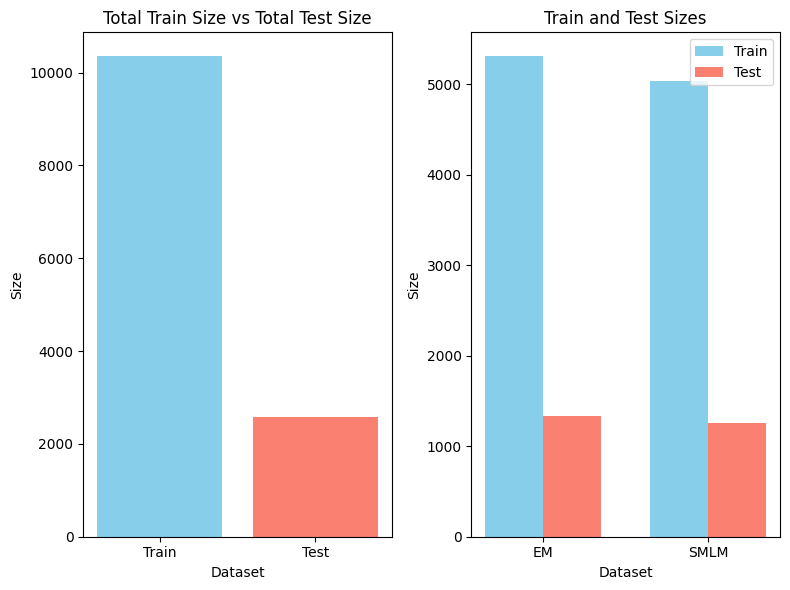

In [50]:
# Sizes of train and test sets
train_sizes = [X_train_EM.shape[0], X_train_SMLM.shape[0]]
test_sizes = [X_test_EM.shape[0], X_test_SMLM.shape[0]]

# Creating the bar chart for total train size vs total test size
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [sum(train_sizes), sum(test_sizes)], color=['skyblue', 'salmon'])
plt.title('Total Train Size vs Total Test Size')
plt.ylabel('Size')
plt.xlabel('Dataset')

# Creating the bar chart for individual train and test sizes
plt.subplot(1, 2, 2)
bar_width = 0.35
index = [0, 1]
plt.bar(index, train_sizes, bar_width, label='Train', color='skyblue')
plt.bar([i + bar_width for i in index], test_sizes, bar_width, label='Test', color='salmon')
plt.xlabel('Dataset')
plt.ylabel('Size')
plt.title('Train and Test Sizes')
plt.xticks([i + bar_width / 2 for i in index], ['EM', 'SMLM'])
plt.legend()

plt.tight_layout()
plt.show()

#### Class labels: train vs test

In [51]:
y_train = np.concatenate((y_train_SMLM, y_train_EM))
y_test = np.concatenate((y_test_SMLM, y_test_EM))

unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print(f'Training labels: {unique_labels_train}\n')
print(f'Test labels: {unique_labels_test}')

Training labels: ['7art' '7ary' '7as5' '7bho' 'hemisphere' 'icosahedron' 'tetrahedron']

Test labels: ['7art' '7ary' '7as5' '7bho' 'hemisphere' 'icosahedron' 'tetrahedron']


#### Class labels: histogram

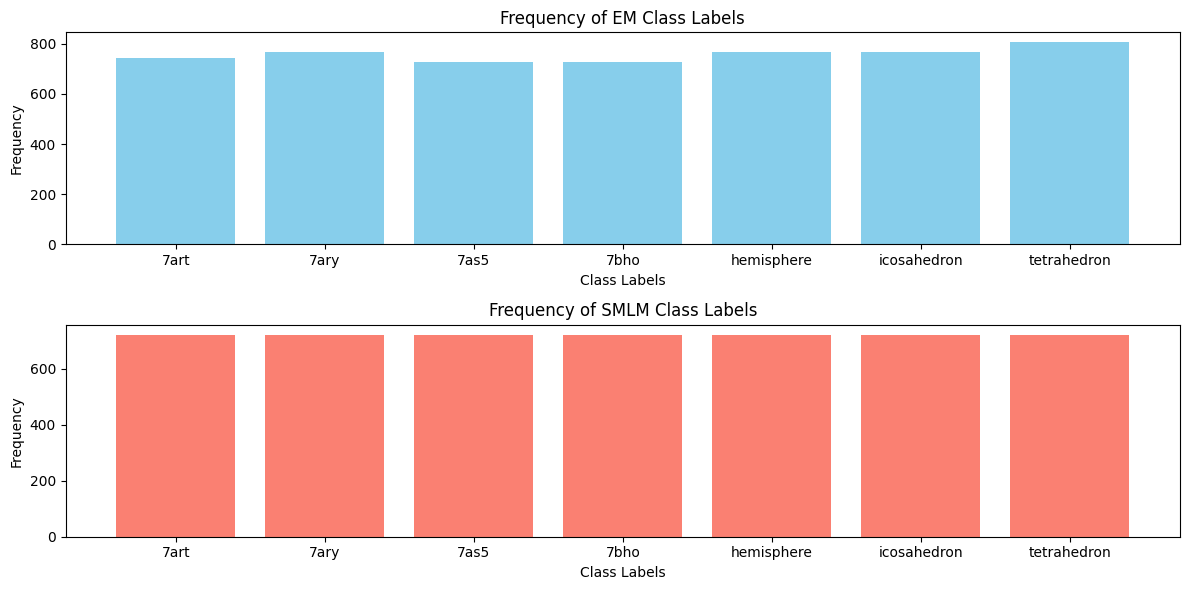

In [52]:
# Get unique class labels and their frequencies for both arrays
unique_labels_EM, counts_EM = np.unique(y_train_EM, return_counts=True)
unique_labels_SMLM, counts_SMLM = np.unique(y_train_SMLM, return_counts=True)

# Plotting bar graphs for y_train_EM
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(unique_labels_EM, counts_EM, tick_label=unique_labels_EM, color='skyblue')
plt.title('Frequency of EM Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

# Plotting bar graphs for y_train_SMLM
plt.subplot(2, 1, 2)
plt.bar(unique_labels_SMLM, counts_SMLM, tick_label=unique_labels_SMLM, color='salmon')
plt.title('Frequency of SMLM Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Visualization

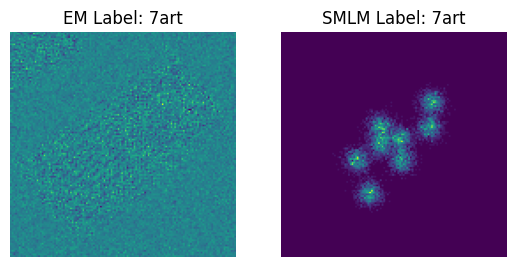

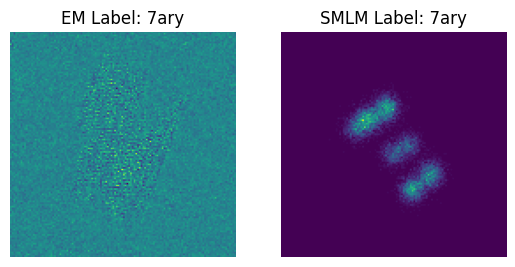

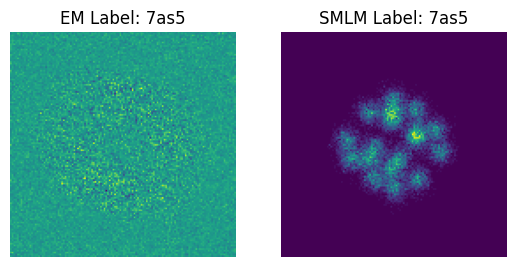

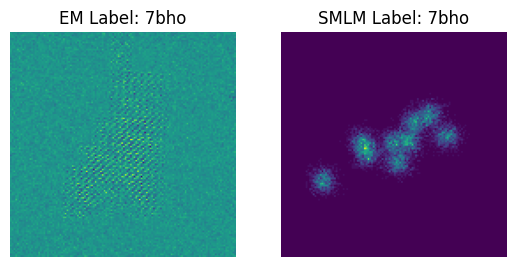

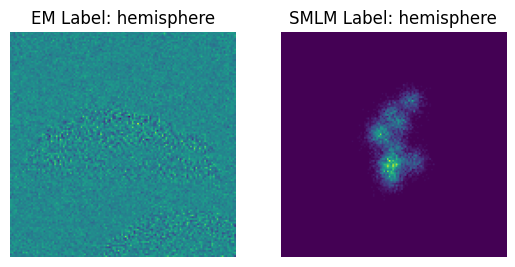

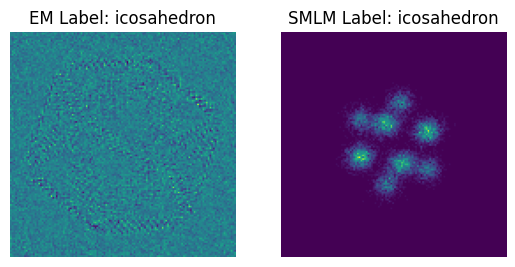

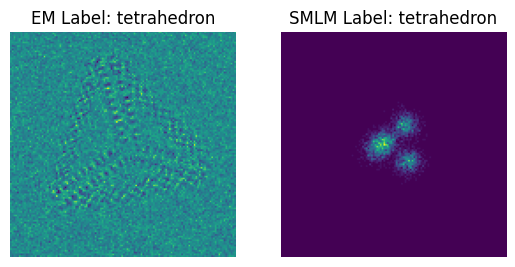

In [53]:
# Find unique labels
unique_labels = np.unique(np.concatenate((y_train_EM, y_train_SMLM)))

# Create a function to get indices of images corresponding to a label
def get_indices(label, y_train):
    return np.where(y_train == label)[0]

# Visualize one image from each category
num_images_to_show = 1

for label in unique_labels:
    em_indices = get_indices(label, y_train_EM)
    smlm_indices = get_indices(label, y_train_SMLM)

    if len(em_indices) >= num_images_to_show and len(smlm_indices) >= num_images_to_show:
        em_image = X_train_EM[em_indices[0]]  # Choosing the first image for EM
        smlm_image = X_train_SMLM[smlm_indices[0]]  # Choosing the first image for SMLM

        # Plotting the images
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(em_image)
        axes[0].set_title('EM Label: ' + str(label))
        axes[0].axis('off')

        axes[1].imshow(smlm_image)
        axes[1].set_title('SMLM Label: ' + str(label))
        axes[1].axis('off')

        plt.show()
    else:
        print(f"Not enough images for label {label} in both datasets.")